<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Analyzing a real world data-set with SQL and Python


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Understand a dataset of selected socioeconomic indicators in Chicago
* Learn how to store data in an Db2 database on IBM Cloud instance
* Solve example problems to practice your SQL skills


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database
Let us first load the SQL extension and establish a connection with the database

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [7]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
# %sql ibm_db_sa://tmy32880:HhHBuNZHNm5zQ3s1@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb?security=SSL

### Store the dataset in a Table
##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [8]:
# import pandas
# chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
# %sql PERSIST chicago_socioeconomic_data

In [59]:
import csv, sqlite3, pandas as pd
# Build connection object and cursor for sqlite database
con = sqlite3.connect("RealWorldData.db")
cur = con.cursor()

In [60]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [61]:
%sql sqlite:///RealWorldData.db

In [62]:
%sql SELECT name, type FROM PRAGMA_table_info('ChicagoCensusData');

 * sqlite:///RealWorldData.db
Done.


name,type
COMMUNITY_AREA_NUMBER,REAL
COMMUNITY_AREA_NAME,TEXT
PERCENT_OF_HOUSING_CROWDED,REAL
PERCENT_HOUSEHOLDS_BELOW_POVERTY,REAL
PERCENT_AGED_16__UNEMPLOYED,REAL
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,REAL
PERCENT_AGED_UNDER_18_OR_OVER_64,REAL
PER_CAPITA_INCOME,INTEGER
HARDSHIP_INDEX,REAL


In [63]:
%sql SELECT * FROM ChicagoCensusData ORDER BY COMMUNITY_AREA_NAME LIMIT 15

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
14.0,Albany Park,11.3,19.2,10.0,32.9,32.0,21323,53.0
57.0,Archer Heights,8.5,14.1,16.5,35.9,39.2,16134,67.0
34.0,Armour Square,5.7,40.1,16.7,34.5,38.3,16148,82.0
70.0,Ashburn,4.0,10.4,11.7,17.7,36.9,23482,37.0
71.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528,74.0
25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0
45.0,Avalon Park,1.4,17.2,21.1,10.6,39.3,24454,41.0
21.0,Avondale,6.0,15.3,9.2,24.7,31.0,20039,42.0
19.0,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0


In [64]:
%sql SELECT * FROM ChicagoCensusData WHERE LOWER(COMMUNITY_AREA_NUMBER) LIKE '%72%'

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0


In [65]:
%sql SELECT name, type FROM PRAGMA_table_info('ChicagoCrimeData');

 * sqlite:///RealWorldData.db
Done.


name,type
ID,INTEGER
CASE_NUMBER,TEXT
DATE,TEXT
BLOCK,TEXT
IUCR,TEXT
PRIMARY_TYPE,TEXT
DESCRIPTION,TEXT
LOCATION_DESCRIPTION,TEXT
ARREST,INTEGER
DOMESTIC,INTEGER


In [71]:
%sql SELECT COMMUNITY_AREA_NUMBER, COUNT(COMMUNITY_AREA_NUMBER) FROM ChicagoCrimeData GROUP BY COMMUNITY_AREA_NUMBER

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,COUNT(COMMUNITY_AREA_NUMBER)
None,0
1.0,6
2.0,7
3.0,4
4.0,3
5.0,4
6.0,11
7.0,5
8.0,15
10.0,3


In [51]:
%sql SELECT * FROM ChicagoCrimeData ORDER BY COMMUNITY_AREA_NUMBER LIMIT 3;

 * sqlite:///RealWorldData.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
1516518,G256545,2001-05-04,045XX S DAMEN AV,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,1,0,914,9,None,None,6,1163610.0,1874345.0,2001,41.81083442,-87.6754139,"(41.810834416, -87.675413895)"
2000970,HH201585,2002-02-22,024XX N MILWAUKEE AV,810,THEFT,OVER $500,BAR OR TAVERN,0,0,1414,14,None,None,6,1156341.0,1915936.0,2002,41.92511408,-87.70095228,"(41.925114077, -87.700952275)"
1476982,G212935,2001-04-14,007XX N GREEN ST,850,THEFT,ATTEMPT THEFT,MOVIE HOUSE/THEATER,0,0,1323,12,None,None,6,1170623.0,1905487.0,2001,41.89614043,-87.64878026,"(41.896140428, -87.648780261)"


In [57]:
%sql SELECT * FROM ChicagoCrimeData WHERE COMMUNITY_AREA_NUMBER IS null;

 * sqlite:///RealWorldData.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
1516518,G256545,2001-05-04,045XX S DAMEN AV,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,1,0,914,9,None,None,6,1163610.0,1874345.0,2001,41.81083442,-87.6754139,"(41.810834416, -87.675413895)"
2000970,HH201585,2002-02-22,024XX N MILWAUKEE AV,810,THEFT,OVER $500,BAR OR TAVERN,0,0,1414,14,None,None,6,1156341.0,1915936.0,2002,41.92511408,-87.70095228,"(41.925114077, -87.700952275)"
1476982,G212935,2001-04-14,007XX N GREEN ST,850,THEFT,ATTEMPT THEFT,MOVIE HOUSE/THEATER,0,0,1323,12,None,None,6,1170623.0,1905487.0,2001,41.89614043,-87.64878026,"(41.896140428, -87.648780261)"
1845995,G662598,2001-11-03,0000X N STATE ST,820,THEFT,$500 AND UNDER,DEPARTMENT STORE,1,0,122,1,None,None,6,1176398.0,1900691.0,2001,41.88285155,-87.62771491,"(41.882851552, -87.627714909)"
1340847,G040244,2001-01-19,063XX N NAGLE AV,820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,1,0,1611,16,None,None,6,1132586.0,1941599.0,2001,41.99598354,-87.78763989,"(41.99598354, -87.787639887)"
1612358,G376790,2001-06-28,0000X S STATE ST,820,THEFT,$500 AND UNDER,DEPARTMENT STORE,1,0,123,1,None,None,6,1176418.0,1900379.0,2001,41.88199496,-87.62765089,"(41.881994955, -87.62765089)"
2088541,HH316735,2002-04-19,031XX S ASHLAND AV,460,BATTERY,SIMPLE,GROCERY FOOD STORE,0,0,922,9,None,None,08B,1166183.0,1883676.0,2002,41.83638523,-87.66571041,"(41.836385231, -87.66571041)"
1778867,G597730,2001-10-05,024XX W HADDON AV,460,BATTERY,SIMPLE,STREET,0,1,1312,12,None,None,08B,1159562.0,1907600.0,2001,41.90217367,-87.6893468,"(41.902173665, -87.689346803)"
1887291,G736811,2001-12-09,035XX W DICKENS AV,460,BATTERY,SIMPLE,RESIDENCE,0,1,1413,14,None,None,08B,1152633.0,1913771.0,2001,41.91924736,-87.71463465,"(41.919247363, -87.714634645)"
1719296,G517474,2001-08-29,017XX W 59 ST,460,BATTERY,SIMPLE,RESIDENCE,0,1,714,7,None,None,08B,1165757.0,1865528.0,2001,41.78659414,-87.66778928,"(41.786594143, -87.66778928)"


In [7]:
%sql SELECT name, type FROM PRAGMA_table_info('ChicagoPublicSchools');

 * sqlite:///RealWorldData.db
Done.


name,type
School_ID,INTEGER
NAME_OF_SCHOOL,TEXT
"Elementary, Middle, or High School",TEXT
Street_Address,TEXT
City,TEXT
State,TEXT
ZIP_Code,INTEGER
Phone_Number,TEXT
Link,TEXT
Network_Manager,TEXT


In [32]:
%sql SELECT * FROM ChicagoPublicSchools WHERE COMMUNITY_AREA_NUMBER = 'None';

 * sqlite:///RealWorldData.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location


##### You can verify that the table creation was successful by making a basic query like:


## Problems

### Problem 1

##### How many rows are in the dataset?


In [12]:
%sql SELECT COUNT(*) FROM ChicagoCensusData;

 * sqlite:///RealWorldData.db
Done.


COUNT(*)
78


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78
```

</details>


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [15]:
%sql SELECT COUNT(*) FROM ChicagoCensusData WHERE HARDSHIP_INDEX > 50.0;

 * sqlite:///RealWorldData.db
Done.


COUNT(*)
38


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

Correct answer: 38
```

</details>


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [16]:
%sql SELECT MAX(HARDSHIP_INDEX) FROM ChicagoCensusData;

 * sqlite:///RealWorldData.db
Done.


MAX(HARDSHIP_INDEX)
98.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
```

</details>



### Problem 4

##### Which community area which has the highest hardship index?


In [18]:
%sql SELECT COMMUNITY_AREA_NAME, MAX(HARDSHIP_INDEX) FROM ChicagoCensusData ORDER BY HARDSHIP_INDEX;

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,MAX(HARDSHIP_INDEX)
Riverdale,98.0


<details><summary>Click here for the solution</summary>

```python
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

Correct answer: 'Riverdale'
    
```

</details>



### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [21]:
%sql SELECT COMMUNITY_AREA_NAME FROM ChicagoCensusData WHERE PER_CAPITA_INCOME > 60000;

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Lake View
Lincoln Park
Near North Side
Loop


<details><summary>Click here for the solution</summary>

```python
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
    
```

</details>




### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///RealWorldData.db
Done.


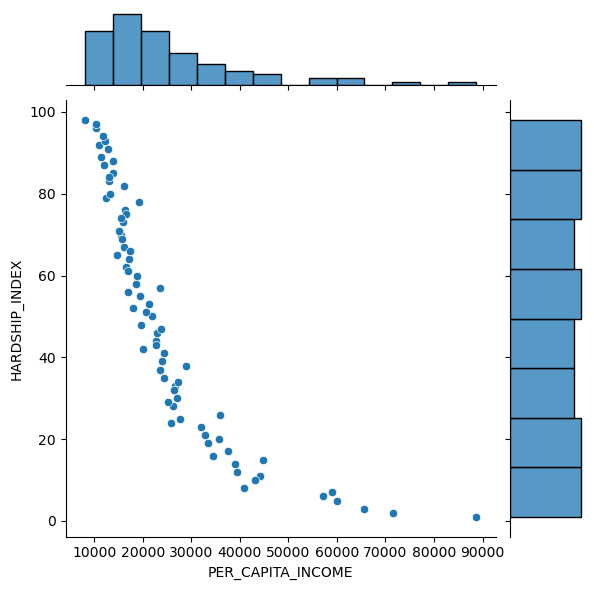

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM ChicagoCensusData;
plot = sns.jointplot(x='PER_CAPITA_INCOME',y='HARDSHIP_INDEX', data=income_vs_hardship.DataFrame())

<details><summary>Click here for the solution</summary>

```python
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn==0.9.0

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
    
```

</details>




### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.


## Author

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">Rav Ahuja</a>


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-11-17  | 2.3  | Lakshmi  | Updated library  |
| 2021-07-09 | 2.2 | Malika | Updated connection string |
| 2021-05-06 | 2.1 |Malika Singla | Added libraries |
| 2020-08-28  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
